## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from lichess import slice_db, sql_io
cdb = sql_io.ChessDB()

### Plot the super-players

<img src="../../data/chess/plots/superplayers_bydate.png">
<img src="../../data/chess/plots/superplayers_pdfcdf.png">

### Fetch players (optionally filter those above/below game count threshold)

In [65]:
HIGH = 10000
LOW = 10
FILTER = False
cdb.query2dataframe("SELECT * from players ORDER BY N_Game DESC")
players = cdb.dataframe; print("n players: %d" % len(players))

if FILTER:
    players = players[players['N_Game'] < 10000]; print("n players: %d" % len(players))
    players = players[players['N_Game'] > 10]; print("n players: %d" % len(players))

executing 
	SELECT * from players ORDER BY N_Game DESC
	at Mon Nov 27 20:36:31 2017... complete: 2.04 seconds elapsed...
n players: 1319726


### Distribution of number of games played by player

In [97]:
n_total_game = np.sum(players.N_Game)
def histoplot(vals):
    plt.hist(vals); plt.gca().grid(alpha=0.2)
    plt.xlabel("number of games")
    plt.ylabel("number of (unique) players")
    plt.title("zoom percent of total: %.2f" % (np.sum(vals)/n_total_game * 100))

/home/paul/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


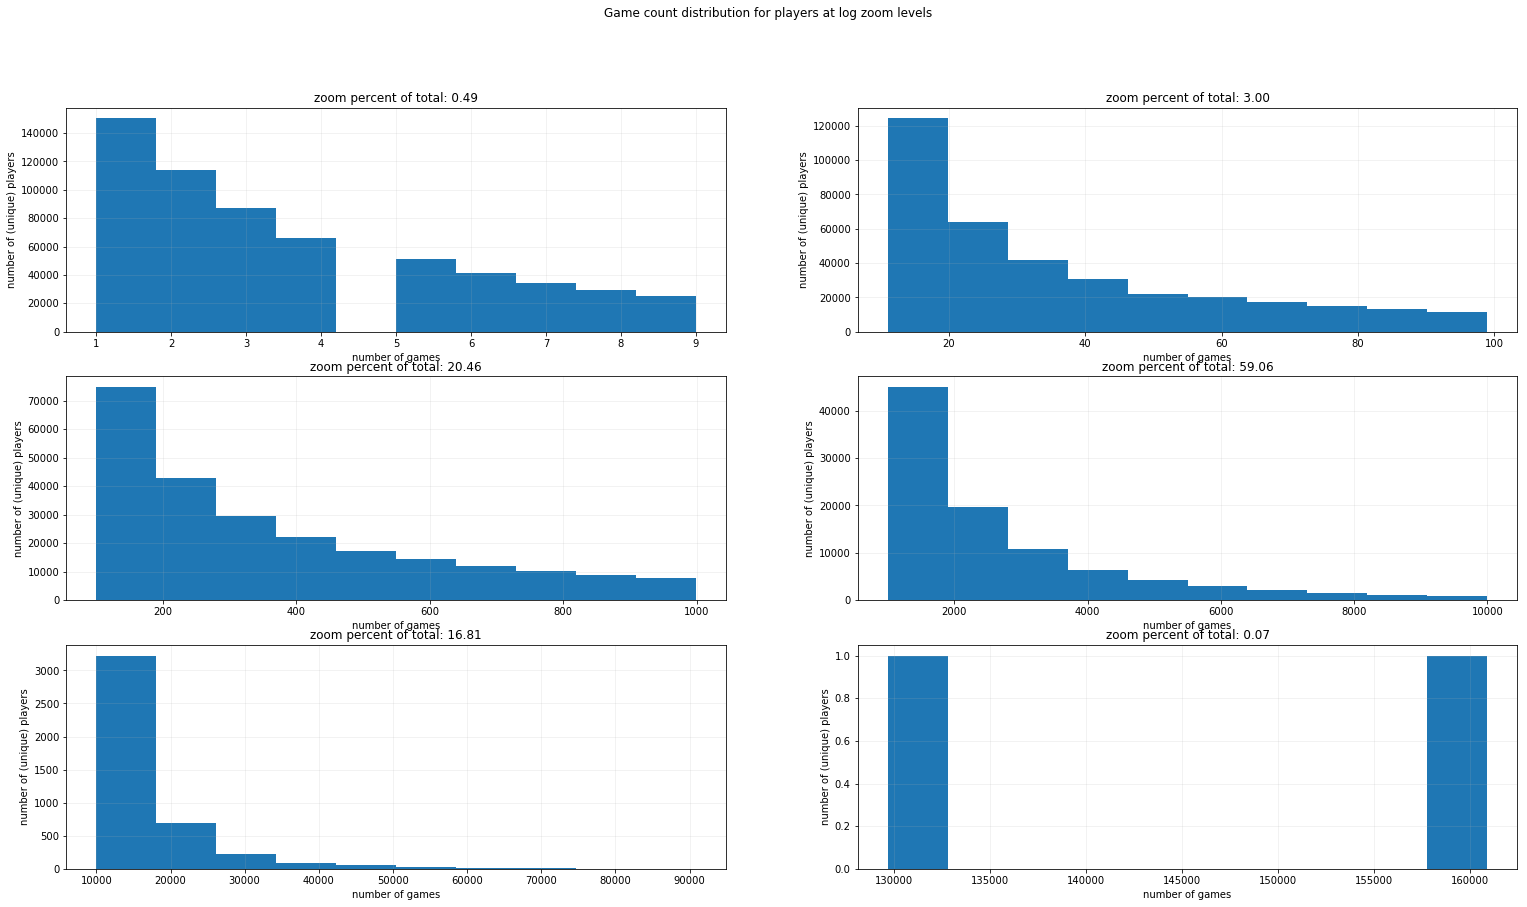

In [96]:
limits = [0, 10, 100, 1000, 10000, 100000, 1000000]
plt.figure(figsize=(26, 14))
for i in range(1, len(limits)):
    plt.subplot(3, 2, i)
    histoplot(players[players.N_Game < limits[i]][players.N_Game > limits[i - 1]].N_Game)

plt.suptitle("Game count distribution for players at log zoom levels");

In [9]:
def get_day_counts(name):
    frame = pd.DataFrame()
    for side in ['White', 'Black']:
        cdb.query2dataframe(
            "SELECT * from games WHERE %s = '%s'"
            % (side, name))
        frame = frame.append(cdb.dataframe)

    datecounts = frame.UTCDate.value_counts(sort=False)
    return datecounts

In [97]:
def day_hist(vals):
    hist, bins = np.histogram(vals)
    plt.plot_date(); plt.gca().grid(alpha=0.2)
    plt.ylabel("number of (unique) players")
    plt.title("zoom percent of total: %.2f" % (np.sum(vals)/n_total_game * 100))

In [ ]:
klk